<a href="https://colab.research.google.com/github/ivanova93/Visualizacion/blob/main/Pec2_de_visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

from sklearn.datasets import load_boston

# Scatterplot
Concepto: Scatterplot es un tipo de gráfico o diagrama matematico que utiliza coordenadas cartesianas para mostrar valores tipicamente dos variables de el set de datos. Si un punto esta codigicado (color, tamaño, grosor), una variable adiccional puede ser mostrada. Los datos son mostrados como una coleccion de puntos, cada uno tiene el valor de una variable que determina la posicion en el eje horizontal y el valor de otra variable en el eje vertical

Sirve para representar la correlacion entre dos variables, ambas cuantitativas, pero tambien permite mostrar datos cualitativos

Por ejemplo, para mostrar la relación entre el precio de un coche y el año de su fabricacion, un investigador elegiría un grupo de coches para estudiar y mediría el precio de cada uno de ellos (primera variable) y el año de su fabricacion (segunda variable). A continuación, el investigador trazaría los datos en un diagrama de dispersión, asignando el "precio de la vivienda" al eje horizontal y el "numero de habitaciones" al eje vertical.

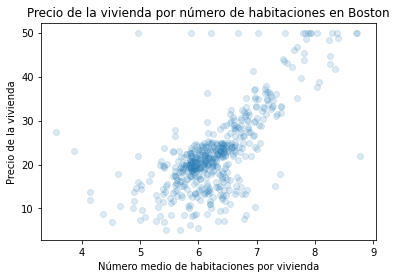

In [ ]:
# Implementacion de scatterplot

def scatterplot():
  
  boston = load_boston()
  X = np.array(boston.data[:, 5])
  Y = np.array(boston.target)

  plt.scatter(X, Y, alpha=0.15)

  plt.title('Precio de la vivienda por número de habitaciones en Boston')
  plt.xlabel('Número medio de habitaciones por vivienda')
  plt.ylabel('Precio de la vivienda')
  plt.show()

scatterplot()

Conclusion: 
Podemos observar la relación entre el precio de una vivienda y el numero medio de habitaciones por vivienta, que hay una tendencia a que cuantas mas habitaciones por vivienda el costo de la misma tiende a ser mayor.

# Stream Graph
Stream Graph es un tipo de gráfico de área apilado que se desplaza alrededor de un eje central, lo que da lugar a una forma fluida y orgánica. A diferencia de un gráfico de áreas apiladas tradicional, en el que las capas se apilan sobre un eje, en un streamgraph las capas se colocan para minimizar su "ondulación".

Sirve para ver como una variable cuantitativa varia a lo largo del tiempo en distintas variables cualitativas

Un ejemplo de Stream Graph usarlo para observar los ingresos de taquilla de cine a lo largo del tiempo.

                          cases  deaths
countriesAndTerritories                
Romania                  418971   10459
Bulgaria                 100923    3106
Germany                  370049    2091
Poland                   112234    1367
Italy                     99179    1204
rm: cannot remove 'daily-number-of-new-reported-COVID-19-cases-and-deaths-by-EU-country.csv': No such file or directory


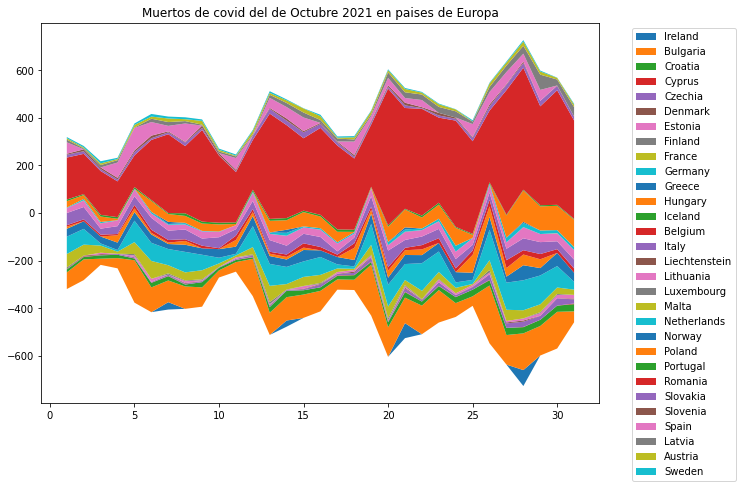

In [ ]:
def stream_graph():

  df = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/nationalcasedeath_eueea_daily_ei/csv/data.csv')
  df = df[df['year']==2021]
  df = df[df['month']==10]
  df = df.sort_values(by='day')

  fig, ax = plt.subplots(figsize=(10, 7))
  ax.stackplot(
      df.day.unique(), 
      [df[df['countriesAndTerritories']==i]['deaths'].to_numpy() for i in df.countriesAndTerritories.unique()], 
      baseline="sym"
      )

  ax.legend(df.countriesAndTerritories.unique(), bbox_to_anchor=(1.05, 1.0), loc='upper left')
  plt.title('Muertos de covid del de Octubre 2021 en paises de Europa')
  print(df.groupby(by='countriesAndTerritories').sum().sort_values(by='deaths', ascending=False)[['cases','deaths']].head(5))
  !rm daily-number-of-new-reported-COVID-19-cases-and-deaths-by-EU-country.csv

stream_graph()

Conclusion: Hemos delimitado la grafica a las muertes del mes de Octubre 2021 en paises de Europa, podemos observar que en pais Europeo con mayor cantidad de muertos es Romania, siguiendole Bulgaria y Germany

# Horizon Graph

Horizon Graph consiste en gráfico de líneas normales se divide en bandas definidas por rangos de valores uniformes. Las bandas se superponen para reducir la altura del gráfico. Los valores negativos pueden reflejarse o desplazarse en el mismo espacio que los valores positivos.

Sirve para representar como fluctua una variable cuantitativa a lo largo del tiempo

Fuente: https://idl.cs.washington.edu/papers/horizon/

In [ ]:
def horizonGraph():
  df = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/vaccine_tracker/csv/data.csv')
  df = df[df['ReportingCountry']=='ES']
  df['Week'] = [i[1] for i in df.YearWeekISO.str.split('-W')]

  aux = df[df['YearWeekISO']!='2020-W53'].groupby(by='Week').sum().sort_values(by='Week')[['FirstDose']]
  aux['aux'] = aux.index
  aux['FirstDose1'] = aux.FirstDose-750000
  aux['FirstDose2'] = aux.FirstDose1-750000
  aux['FirstDose3'] = aux.FirstDose2-750000
  aux['FirstDose4'] = aux.FirstDose3-750000

  def chart(y, o=0.20):
    return alt.Chart(aux).mark_area(clip=True, interpolate='monotone').encode(
        alt.X('aux:Q', scale=alt.Scale(zero=False, nice=False), title='Semanas del 2021'),
        alt.Y(y, scale=alt.Scale(domain=[0, 750000]), title='Primera dosis'),
        opacity=alt.value(o)).properties(width=500, height=75)

  area1 = chart('FirstDose:Q', 0.2)
  area2 = chart('FirstDose1:Q', 0.3)
  area3 = chart('FirstDose2:Q', 0.4)
  area4 = chart('FirstDose3:Q', 0.5)
  area5 = chart('FirstDose4:Q', 1)

  aux = df[df['YearWeekISO']!='2020-W53'].groupby(by='Week').sum().sort_values(by='Week')[['SecondDose']]
  aux['aux'] = aux.index
  aux['SecondDose1'] = aux.SecondDose-1000000
  aux['SecondDose2'] = aux.SecondDose1-1000000
  aux['SecondDose3'] = aux.SecondDose2-1000000
  aux['SecondDose4'] = aux.SecondDose3-1000000
  aux['SecondDose5'] = aux.SecondDose4-1000000

  def chart(y, o=0.20):
    return alt.Chart(aux).mark_area(clip=True, interpolate='monotone').encode(
        alt.X('aux:Q', scale=alt.Scale(zero=False, nice=False), title='Semanas del 2021'),
        alt.Y(y, scale=alt.Scale(domain=[0, 1000000]), title='Segunda dosis'),
        opacity=alt.value(o)).properties(width=500, height=75)

  v_area1 = chart('SecondDose:Q', 0.2)
  v_area2 = chart('SecondDose1:Q', 0.3)
  v_area3 = chart('SecondDose2:Q', 0.4)
  v_area4 = chart('SecondDose3:Q', 0.5)
  v_area5 = chart('SecondDose4:Q', 1)

  return ( area1 + area2 + area3 + area4 + area5 ) & ( v_area1 + v_area2 + v_area3 + v_area4 + v_area5 )

horizonGraph()

alt.VConcatChart(...)